### Let's set up our work environment

In [59]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the data

In [60]:
dataset = pd.read_csv('Social_network_Ads.csv')

### Discover the data

In [61]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


### Look at the Big Picture

We have a dataset that contains 5 columns (User ID, Gender, Age, EstimatedSalary and Purchased). The independent variables here are the first four columns: User ID, Gender, Age, and EstimatedSalary. And the dependent variable is the last column: Purchased.

### Frame the problem

Business scenario: We imagine that we work for a car company that has just released its new product. This new product is a luxury car that is absolutely not expensive. And for belly this car en masse, this company has put an advertisement on social networks. And the users of these social networks by seeing the ad decide whether or not to buy the car. And this decision to buy the car is given in the last column 'Purchased': where 0 means no, the user did not buy the car and 1 means that yes, the user clicked on the ad to buy the car. Since this advertising is put on social networks, we have other information about the users of these social networks, namely the gender, the User ID, the age and the estimated salary because one of these social networks is a network. social professional so we can get an idea of ​​the salary. So we have this information about the user and we also have his answer that is to say whether he bought the car or not. From this information, we will build a classification model that includes the correlations the information contained in the independent variables ('User ID', 'Gender', 'Age' and 'EstimatedSalary') and the user's decision to buy yes or no the car. And once the model establishes these correlations, it can establish new predictions and predict the likelihood that a new user on social networks will buy the car or not. This model will bring a lot of value to this company because after doing a ranking of probability of the most likely users to buy the car, this company will be able to target users on social networks. It will therefore be able to target a certain age range and a certain amount of estimated salary to targeter users and prioritize advertising. Display advertising on social networks represents a certain cost and therefore the company can optimize its costs and therefore its returns on investment since the users it targets will be the most likely to buy the car through this ranking of given probabilities by our classification model. So that's the CHALLENGE, that's what we need to create with logistic regression.

### Visualize the data to gain insights

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


This dataset includes 400 instances. This represents a relatively average amount of data for Machine Learning standards. All values are known. There is no unknown value (NaN). The values in the 'Gender' column are categorical values.

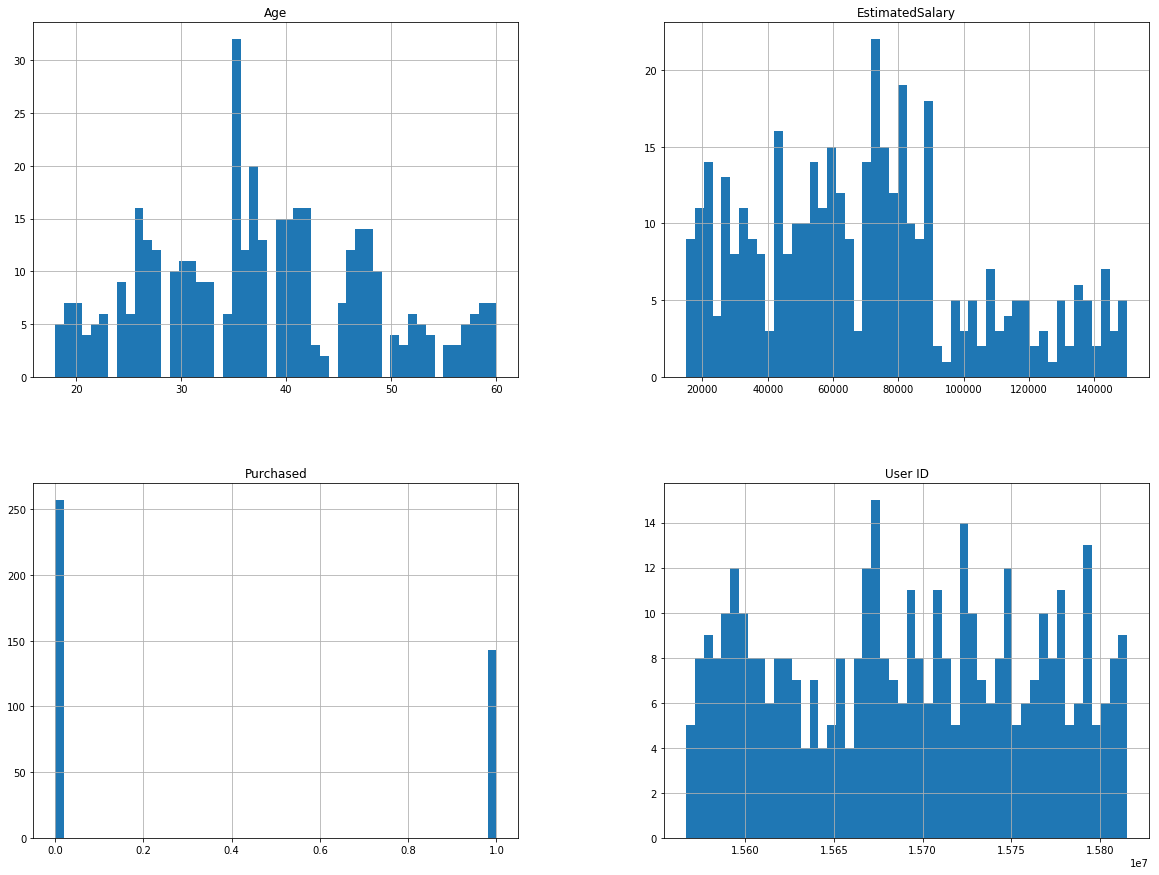

In [63]:
%matplotlib inline
import	matplotlib.pyplot	as	plt
dataset.hist(bins=50,	figsize=(20,15))
plt.show()

### Preparation the data for Machine Learning algoritms

#### Create variables : x and y
Create our variables, we are going to use a very useful technical of Pandas, named Iloc.

In [64]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Visualize x and y

In [65]:
x

array([[15624510, 'Male', 19.0, 19000.0],
       [15810944, 'Male', 35.0, 20000.0],
       [15668575, 'Female', 26.0, 43000.0],
       ...,
       [15654296, 'Female', 50.0, 20000.0],
       [15755018, 'Male', 36.0, 33000.0],
       [15594041, 'Female', 49.0, 36000.0]], dtype=object)

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Simplifions notre modèle
Nous pouvons simplifier notre modèle en ce sens que la colonne 'User ID' n'a aucun impact sur la décision d'acheter ou non la voiture. Il s'agit juste de code pour différencier les utilisateurs. Ces codes n'ont aucune corrélation avec la variable dépendante qui est : est-ce-que l'utilisateur va acheter, oui ou non la voiture ? 
Nous allons donc retirer la colonne 'User ID'. 
On se rend aussi compte que la variable 'Gender' n'a pas d'impact sur notre variable dépendante. Lorsqu'on regarde le nombre d'hommes qui a acheté la voiture et qui n'a pas acheté la voiture et le nombre de femme qui a acheté et qui n'a pas acheté la voiture, on voit qu'il y'a une très faible différence entre les 2 et que par conséquent, le gendre n'a pas d'impact sur la décision de l'utilisateur d'acheter ou non la voiture. Par contre l'âge et le salaire estimé pourraient avoir un impact sur la décision d'acheter la voiture ou non. Nous allons donc garder ces 2 colonnes dans notre matrice de feattures.

In [67]:
# Retirons le colonne 'User ID' et 'Gender'
x = x[:, [2, 3]]
# Vérifions si 'User ID'  et 'Gender' ont été correctement retirées
x

array([[19.0, 19000.0],
       [35.0, 20000.0],
       [26.0, 43000.0],
       [27.0, 57000.0],
       [19.0, 76000.0],
       [27.0, 58000.0],
       [27.0, 84000.0],
       [32.0, 150000.0],
       [25.0, 33000.0],
       [35.0, 65000.0],
       [26.0, 80000.0],
       [26.0, 52000.0],
       [20.0, 86000.0],
       [32.0, 18000.0],
       [18.0, 82000.0],
       [29.0, 80000.0],
       [47.0, 25000.0],
       [45.0, 26000.0],
       [46.0, 28000.0],
       [48.0, 29000.0],
       [45.0, 22000.0],
       [47.0, 49000.0],
       [48.0, 41000.0],
       [45.0, 22000.0],
       [46.0, 23000.0],
       [47.0, 20000.0],
       [49.0, 28000.0],
       [47.0, 30000.0],
       [29.0, 43000.0],
       [31.0, 18000.0],
       [31.0, 74000.0],
       [27.0, 137000.0],
       [21.0, 16000.0],
       [28.0, 44000.0],
       [27.0, 90000.0],
       [35.0, 27000.0],
       [33.0, 28000.0],
       [30.0, 49000.0],
       [26.0, 72000.0],
       [27.0, 31000.0],
       [27.0, 17000.0],
       [33.0, 

Les colonnes 'User ID' et 'Gender' ont bien été retirées.

### Divide the dataset in Training / Test Set

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [69]:
# Take a look on new variables (x_train, y_train, x_test and y_test)
x_train

array([[44.0, 39000.0],
       [32.0, 120000.0],
       [38.0, 50000.0],
       [32.0, 135000.0],
       [52.0, 21000.0],
       [53.0, 104000.0],
       [39.0, 42000.0],
       [38.0, 61000.0],
       [36.0, 50000.0],
       [36.0, 63000.0],
       [35.0, 25000.0],
       [35.0, 50000.0],
       [42.0, 73000.0],
       [47.0, 49000.0],
       [59.0, 29000.0],
       [49.0, 65000.0],
       [45.0, 131000.0],
       [31.0, 89000.0],
       [46.0, 82000.0],
       [47.0, 51000.0],
       [26.0, 15000.0],
       [60.0, 102000.0],
       [38.0, 112000.0],
       [40.0, 107000.0],
       [42.0, 53000.0],
       [35.0, 59000.0],
       [48.0, 41000.0],
       [48.0, 134000.0],
       [38.0, 113000.0],
       [29.0, 148000.0],
       [26.0, 15000.0],
       [60.0, 42000.0],
       [24.0, 19000.0],
       [42.0, 149000.0],
       [46.0, 96000.0],
       [28.0, 59000.0],
       [39.0, 96000.0],
       [28.0, 89000.0],
       [41.0, 72000.0],
       [45.0, 26000.0],
       [33.0, 69000.0],
     

In [70]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [71]:
x_test

array([[30.0, 87000.0],
       [38.0, 50000.0],
       [35.0, 75000.0],
       [30.0, 79000.0],
       [35.0, 50000.0],
       [27.0, 20000.0],
       [31.0, 15000.0],
       [36.0, 144000.0],
       [18.0, 68000.0],
       [47.0, 43000.0],
       [30.0, 49000.0],
       [28.0, 55000.0],
       [37.0, 55000.0],
       [39.0, 77000.0],
       [20.0, 86000.0],
       [32.0, 117000.0],
       [37.0, 77000.0],
       [19.0, 85000.0],
       [55.0, 130000.0],
       [35.0, 22000.0],
       [35.0, 47000.0],
       [47.0, 144000.0],
       [41.0, 51000.0],
       [47.0, 105000.0],
       [23.0, 28000.0],
       [49.0, 141000.0],
       [28.0, 87000.0],
       [29.0, 80000.0],
       [37.0, 62000.0],
       [32.0, 86000.0],
       [21.0, 88000.0],
       [37.0, 79000.0],
       [57.0, 60000.0],
       [37.0, 53000.0],
       [24.0, 58000.0],
       [18.0, 52000.0],
       [22.0, 81000.0],
       [34.0, 43000.0],
       [31.0, 34000.0],
       [49.0, 36000.0],
       [27.0, 88000.0],
       [41

In [72]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### Feature Scaling

Should we apply Feature Scaling? The answer is yes. Since we no longer have this linear combination of independent variables that is equal to the dependent variable. We must therefore apply Feature Scaling to put the independent variables on the same scale. We will therefore use the Standardization method which subtracts observations by the mean and divides it by the standard deviation.

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Feature Scaling is applied. Check it.

In [74]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [75]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

We can see that all the values have been well scaled.

### Select and train a model

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

That's it, our logistic regression model is well created and has all the default settings as we can see.

### Make a prediction

In [77]:
# Faisons de nouvelles prédictions
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [78]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

When we quickly compare the results of 'y_pred' and 'y_test', we see that our model has made few errors. But let's analyze all of this effectively using the confusion matrix.

### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

Of the 100 Test Set users, our model predicted 65 times correctly that the user does not buy the car. He correctly predicted 24 times that the user buys the product. He incorrectly predicted 8 times that the user does not buy the car. And 3 times incorrectly that the user buys the car.

### Accuracy

The accuracy is the number of correct predictions on the total number of observations.

In [80]:
# Accuracy
classifier.score(x_test, y_test)

0.89

### 89%. Not bad at all.

### Let's see the results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


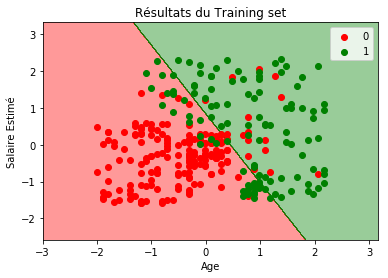

In [93]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

Here are the results of the Training Set. Two major important distinctions to make. 1_ A distinction between points and regions. First, let's analyze at the point level. The points are the actual observations, ie what actually happened, whether the user bought the car or not? The green points are the users who actually bought the car. And the red dots are the users who did not buy the car. It is observed that younger users with a lower estimated salary not bought the car even though it is at a very good price. And older users with a higher estimated salary bought the car, which is quite normal. However, we see that there are younger users with a fairly low estimated salary who still bought the car as well as older people. Users with a high enough salary but young people also bought the car. The red and green dots are what actually happened. Then let's analyze at the level of the regions. The regions, red and green, are the regions where the model predicts the result 0 or 1. The green region is the region where the model predicts that the user buys the car, that is to say that for every user in the green region here, our model predicts that the user will buy the car. And for any user in the red region, the model predicts that the user is not going to buy the car. 2_ The straight line here is our prediction limit curve ie the border between these 2 regions: the region that the model predicts that the user does not buy the car and the region where the model predicts that the user buys the car. The fact that the prediction curve is a straight line means nothing more than the logistic regression model is linear. Any linear classification model will have a straight line as the prediction limit. The problem as it is a straight line, she can not properly classify users. So, we need a model whose prediction boundary can be a curve that will rank the red dots and the green dots.

### Let's look at the results of the Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


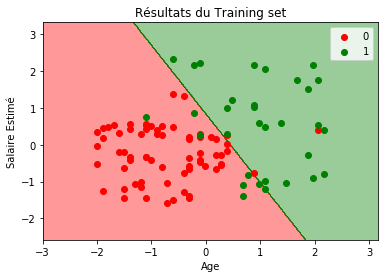

In [94]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

No surprise. The same results are observed because the observations of the Training Set and the Test Set are distributed in a similar way.